# 1. zadatak - priprema podataka

In [ ]:
from data_utils.NLPDataset import NLPDataset
from torch.utils.data import DataLoader
from data_utils.data_utils import pad_collate_fn

batch_size = 2 # Only for demonstrative purposes
shuffle = False # Only for demonstrative purposes
train_dataset = NLPDataset('data/sst_train_raw.csv')
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, 
                              shuffle=shuffle, collate_fn=pad_collate_fn)
texts, labels, lengths = next(iter(train_dataloader))
print(f"Texts: {texts}")
print(f"Labels: {labels}")
print(f"Lengths: {lengths}")

Kreiram svoj data vocabulary
Kreiram svoj label vocabulary
Texts: tensor([[   2,  554,    7, 2872,    6,   22,    2, 2873, 1236,    8,   96, 4800,
            4,   10,   72,    8,  242,    6,   75,    3, 3576,   56, 3577,   34,
         2022, 2874, 7123, 3578, 7124,   42,  779, 7125,    0,    0],
        [   2, 2875, 2023, 4801,    5,    2, 3579,    5,    2, 2876, 4802,    7,
           40,  829,   10,    3, 4803,    5,  627,   62,   27, 2877, 2024, 4804,
          962,  715,    8, 7126,  555,    5, 7127, 4805,    8, 7128]])
Labels: tensor([1, 1])
Lengths: tensor([32, 34])


In [ ]:
vocab = train_dataset.data_voc
embedding_matrix = vocab.get_embedding_matrix("data_utils/sst_glove_6b_300d.txt")

In [ ]:
embedding_matrix(texts).shape

torch.Size([2, 34, 300])

# 2. zadatak - implementacija baseline modela

In [ ]:
from data_utils.NLPDataset import NLPDataset
from torch.utils.data import DataLoader
from data_utils.data_utils import pad_collate_fn

from PoolNetTask2 import *

train_dataset = NLPDataset('data/sst_train_raw.csv')
test_dataset = NLPDataset('data/sst_test_raw.csv', train_dataset.data_voc, train_dataset.label_voc)
val_dataset = NLPDataset('data/sst_valid_raw.csv', train_dataset.data_voc, train_dataset.label_voc)

vocab = train_dataset.data_voc
embedding_matrix = vocab.get_embedding_matrix("data_utils/sst_glove_6b_300d.txt")


# test accuracy, test f1

test_loss_list = []
test_acc_list = []
test_f1_list = []

for i in range(5):
  print("Iteracija ", i)
  model = PoolNet(embedding_matrix)
  model.train(train_dataset, val_dataset, no_epochs=10, lr = 1e-4, weight_decay=0, batch_size=10)

  dataloader_test = DataLoader(dataset=test_dataset, batch_size=32, 
                                shuffle=True, collate_fn=pad_collate_fn, drop_last=True)
  test_loss, test_avg_accuracy, test_avg_precision, eval_avg_recall, test_avg_f1, conf_matrix_test = model.evaluate(dataloader_test, 32)
  print("Test loss:", test_loss)
  print("Test accuracy: ", test_avg_accuracy)
  print("Test f1: ", test_avg_f1)
  print("Test cm:", conf_matrix_test)
  test_loss_list.append(test_loss)
  test_acc_list.append(test_avg_accuracy)
  test_f1_list.append(test_avg_f1)

Kreiram svoj data vocabulary
Iteracija  0
Epoch: 0 , loss: 0.6662231083808606


/content/utils.py:9: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Eval set: Avg. loss: 0.6174, Accuracy: 0.7467, Precision: 0.5000, Recall: 0.7244 F1: 0.5704
Conf matrix eval: [662, 247, 697, 214]


Epoch: 1 , loss: 0.5628107919255433
Eval set: Avg. loss: 0.5245, Accuracy: 0.7571, Precision: 1.0000, Recall: 0.6565 F1: 0.5463
Conf matrix eval: [594, 315, 784, 127]


Epoch: 2 , loss: 0.49748615982990735
Eval set: Avg. loss: 0.5453, Accuracy: 0.7407, Precision: 1.0000, Recall: 0.5758 F1: 0.5090
Conf matrix eval: [526, 382, 822, 90]


Epoch: 3 , loss: 0.472029187355858
Eval set: Avg. loss: 0.5412, Accuracy: 0.7626, Precision: 1.0000, Recall: 0.6598 F1: 0.5475
Conf matrix eval: [600, 309, 788, 123]


Epoch: 4 , loss: 0.46256608182209075
Eval set: Avg. loss: 0.5808, Accuracy: 0.7445, Precision: 1.0000, Recall: 0.6023 F1: 0.5247
Conf matrix eval: [553, 356, 802, 109]


Epoch: 5 , loss: 0.4558938037216491


/content/utils.py:8: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)
/content/utils.py:11: RuntimeWarning: invalid value encountered in true_divide
  f1 = tp / (tp + 0.5 * (tp + fn))


Eval set: Avg. loss: 0.5688, Accuracy: 0.7533, Precision: 1.0000, Recall: 0.6870 F1: 0.5591
Conf matrix eval: [629, 280, 742, 169]


Epoch: 6 , loss: 0.4522232868294151
Eval set: Avg. loss: 0.6660, Accuracy: 0.7225, Precision: 0.7500, Recall: 0.5307 F1: 0.4782
Conf matrix eval: [485, 423, 830, 82]


Epoch: 7 , loss: 0.444387931322862
Eval set: Avg. loss: 0.6878, Accuracy: 0.7242, Precision: 1.0000, Recall: 0.5480 F1: 0.4959
Conf matrix eval: [494, 414, 824, 88]


Epoch: 8 , loss: 0.44420051365832375
Eval set: Avg. loss: 0.7108, Accuracy: 0.7209, Precision: 0.6667, Recall: 0.5307 F1: 0.4884
Conf matrix eval: [481, 427, 831, 81]


Epoch: 9 , loss: 0.4370751843351677
Eval set: Avg. loss: 0.6862, Accuracy: 0.7341, Precision: 0.7500, Recall: 0.5719 F1: 0.5107
Conf matrix eval: [523, 386, 813, 98]


Best epoch:  3
Test loss: 0.6629339037118135
Test accuracy:  0.7175925925925926
Test cm: [248, 193, 372, 51]
Iteracija  1
Epoch: 0 , loss: 0.6588608730218314
Eval set: Avg. loss: 0.6056, Accuracy

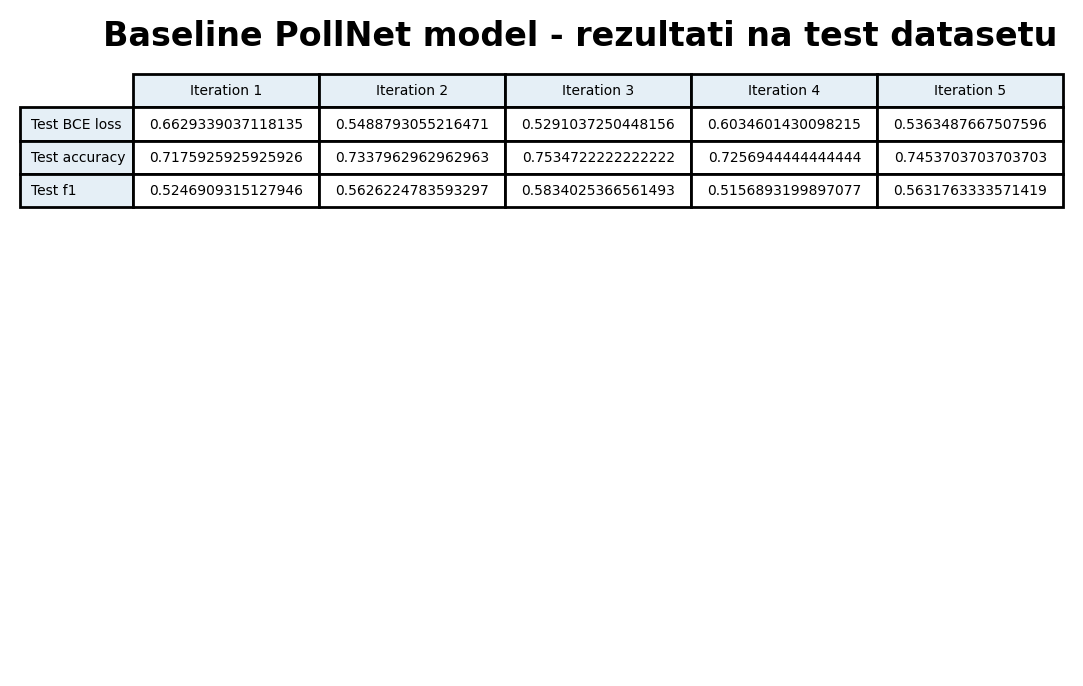

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib
from matplotlib.pyplot import figure
import numpy as np
column_headers = ["Iteration 1", "Iteration 2", "Iteration 3", "Iteration 4", "Iteration 5"]
row_headers = ["Test BCE loss", "Test accuracy", "Test f1"]

rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))

# print(test_loss_list)
# print(test_acc_list)
# print(test_f1_list)

matplotlib.rcParams["figure.dpi"] = 200

cell_text = [test_loss_list, test_acc_list, test_f1_list]

fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = cell_text,  
    rowLabels = row_headers,  
    colLabels = column_headers, 
    rowColours = rcolors,  
    colColours = ccolors, 
    cellLoc ='center',  
    loc ='upper left')     
   
ax.set_title('Baseline PollNet model - rezultati na test datasetu', 
             fontweight ="bold") 
   
plt.show() 

In [ ]:
vocab.decode([2])

In [ ]:
embedding_matrix(torch.tensor(2))

# 3. zadatak - Implementacija povratne neuronske mreže

In [ ]:
from data_utils.NLPDataset import NLPDataset
from torch.utils.data import DataLoader
from data_utils.data_utils import pad_collate_fn

from RNNTask3 import *

train_dataset = NLPDataset('data/sst_train_raw.csv')
test_dataset = NLPDataset('data/sst_test_raw.csv', train_dataset.data_voc, train_dataset.label_voc)
val_dataset = NLPDataset('data/sst_valid_raw.csv', train_dataset.data_voc, train_dataset.label_voc)

vocab = train_dataset.data_voc
embedding_matrix = vocab.get_embedding_matrix("data_utils/sst_glove_6b_300d.txt")

# test accuracy, test f1

test_loss_list = []
test_acc_list = []
test_f1_list = []


for i in range(5):
  print("Iteracija ", i)
  model = VanillaRNN(embedding_matrix)
  model.train(train_dataset, val_dataset, no_epochs=10, lr = 1e-4, weight_decay=0, batch_size=10)

  dataloader_test = DataLoader(dataset=test_dataset, batch_size=32, 
                                shuffle=True, collate_fn=pad_collate_fn, drop_last=True)
  test_loss, test_avg_accuracy, test_avg_precision, eval_avg_recall, test_avg_f1, conf_matrix_test = model.evaluate(dataloader_test, 32)
  print("Test loss:", test_loss)
  print("Test accuracy: ", test_avg_accuracy)
  print("Test f1: ", test_avg_f1)
  print("Test cm:", conf_matrix_test)
  test_loss_list.append(test_loss)
  test_acc_list.append(test_avg_accuracy)
  test_f1_list.append(test_avg_f1)

Kreiram svoj data vocabulary
Iteracija  0
Epoch: 0 , loss: 0.6927432331735688


/content/utils.py:9: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Eval set: Avg. loss: 0.6936, Accuracy: 0.5181, Precision: 0.6667, Recall: 0.2362 F1: 0.2660

Conf matrix eval: [223, 685, 720, 192]
Epoch: 1 , loss: 0.5717290253351534


/content/utils.py:8: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)
/content/utils.py:11: RuntimeWarning: invalid value encountered in true_divide
  f1 = tp / (tp + 0.5 * (tp + fn))


Eval set: Avg. loss: 0.7244, Accuracy: 0.6538, Precision: 0.7778, Recall: 0.9070 F1: 0.6399

Conf matrix eval: [822, 87, 368, 543]
Epoch: 2 , loss: 0.5109457229990835
Eval set: Avg. loss: 0.6622, Accuracy: 0.6907, Precision: 0.3750, Recall: 0.8732 F1: 0.6258

Conf matrix eval: [805, 103, 452, 460]
Epoch: 3 , loss: 0.48984333300004806
Eval set: Avg. loss: 0.5308, Accuracy: 0.7407, Precision: 0.6000, Recall: 0.8105 F1: 0.6077

Conf matrix eval: [734, 175, 614, 297]
Epoch: 4 , loss: 0.476658266102303
Eval set: Avg. loss: 0.5231, Accuracy: 0.7352, Precision: 0.5000, Recall: 0.7995 F1: 0.6054

Conf matrix eval: [724, 184, 614, 298]
Epoch: 5 , loss: 0.4692829613051663
Eval set: Avg. loss: 0.5529, Accuracy: 0.7346, Precision: 0.6667, Recall: nan F1: nan

Conf matrix eval: [824, 85, 513, 398]
Epoch: 6 , loss: 0.4689725089409103
Eval set: Avg. loss: 0.5171, Accuracy: 0.7582, Precision: 0.6667, Recall: nan F1: nan

Conf matrix eval: [691, 217, 689, 223]
Epoch: 7 , loss: 0.4737631231384901
Eval s

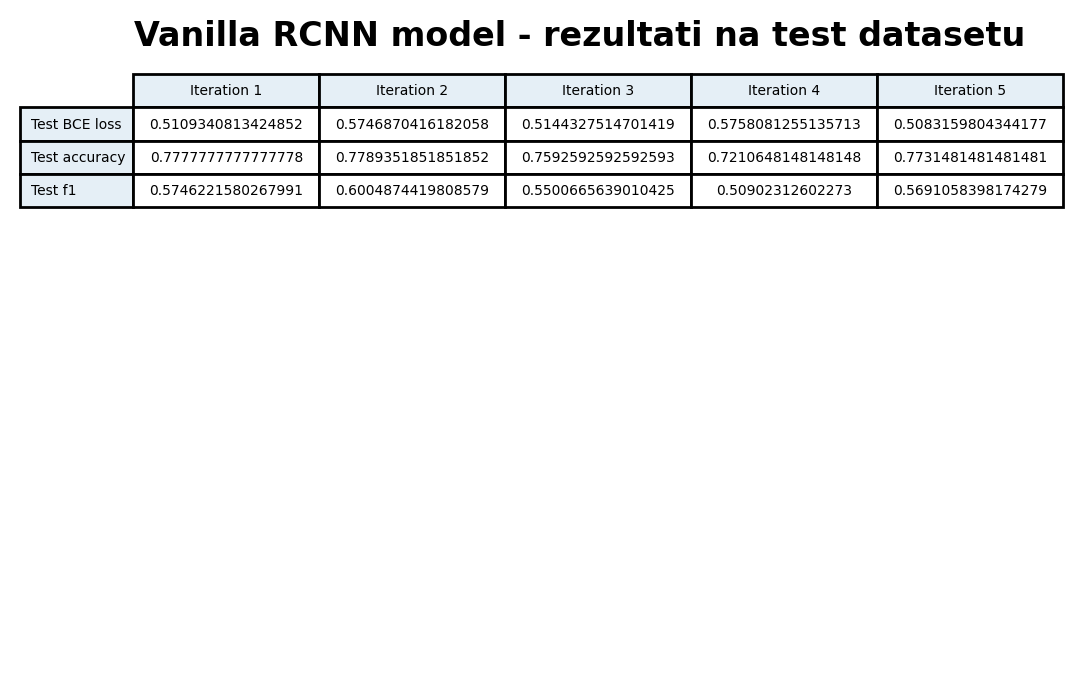

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib
from matplotlib.pyplot import figure
import numpy as np
column_headers = ["Iteration 1", "Iteration 2", "Iteration 3", "Iteration 4", "Iteration 5"]
row_headers = ["Test BCE loss", "Test accuracy", "Test f1"]

rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))

# print(test_loss_list)
# print(test_acc_list)
# print(test_f1_list)

matplotlib.rcParams["figure.dpi"] = 200

cell_text = [test_loss_list, test_acc_list, test_f1_list]

fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = cell_text,  
    rowLabels = row_headers,  
    colLabels = column_headers, 
    rowColours = rcolors,  
    colColours = ccolors, 
    cellLoc ='center',  
    loc ='upper left')     
   
ax.set_title("Vanilla RCNN model - rezultati na test datasetu", 
             fontweight ="bold") 
   
plt.show() 

Primijećujemo nešto bolje rezultate u odnosu na baseline model

# 4. zadatak - Usporedba modela i pretraga hiperparametara

In [ ]:
from data_utils.NLPDataset import NLPDataset
from torch.utils.data import DataLoader
from data_utils.data_utils import pad_collate_fn

from PoolNetTask2 import *
from RNNTask4 import *

train_dataset = NLPDataset('data/sst_train_raw.csv')
test_dataset = NLPDataset('data/sst_test_raw.csv', train_dataset.data_voc, train_dataset.label_voc)
val_dataset = NLPDataset('data/sst_valid_raw.csv', train_dataset.data_voc, train_dataset.label_voc)

vocab = train_dataset.data_voc
embedding_matrix = vocab.get_embedding_matrix("data_utils/sst_glove_6b_300d.txt")

# test accuracy, test f1

pool_avg_loss = 0
pool_avg_acc = 0
pool_avg_f1 = 0

vanilla_avg_loss = 0
vanilla_avg_acc = 0
vanilla_avg_f1 = 0

gru_avg_loss = 0
gru_avg_acc = 0
gru_avg_f1 = 0

lstm_avg_loss = 0
lstm_avg_acc = 0
lstm_avg_f1 = 0

nets = ["pool","vanilla", "gru", "lstm"]

for net in nets:
  test_loss_list = []
  test_acc_list = []
  test_f1_list = []
  for i in range(5):
    if (net == "pool"):
      model = PoolNet(embedding_matrix)
    else:
      model = RNN(embedding_matrix, rnn_type=net)
    model.train(train_dataset, val_dataset, no_epochs=10, lr = 1e-4, weight_decay=0, batch_size=10)

    dataloader_test = DataLoader(dataset=test_dataset, batch_size=32, 
                                  shuffle=True, collate_fn=pad_collate_fn, drop_last=True)
    test_loss, test_avg_accuracy, test_avg_precision, eval_avg_recall, test_avg_f1, conf_matrix_test = model.evaluate(dataloader_test, 32)

    test_loss_list.append(test_loss)
    test_acc_list.append(test_avg_accuracy)
    test_f1_list.append(test_avg_f1)

  avg_loss = np.mean(test_loss_list)
  avg_acc = np.mean(test_acc_list)
  avg_f1 = np.mean(test_f1_list)

  if (net == "pool"):
    pool_avg_loss = avg_loss
    pool_avg_acc = avg_acc
    pool_avg_f1 = avg_f1
  elif (net == "vanilla"):
    vanilla_avg_loss = avg_loss
    vanilla_avg_acc = avg_acc
    vanilla_avg_f1 = avg_f1
  elif(net == "gru"):
    gru_avg_loss = avg_loss
    gru_avg_acc = avg_acc
    gru_avg_f1 = avg_f1
  else:
    lstm_avg_loss = avg_loss
    lstm_avg_acc = avg_acc
    lstm_avg_f1 = avg_f1

# sutra kad ćeš ići raditi onu pretragu u 4.a dijelu zadatka, ja bi krenuo od toga da je ovo ^ osnovni model, i testirao bi hiperparametre tako da mijenjam 1 hiperparametar, a da su mi svi
# ostali fiksni 

Kreiram svoj data vocabulary
Epoch: 0 , loss: 0.6615083216759511


/content/utils.py:11: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)
/content/utils.py:14: RuntimeWarning: invalid value encountered in true_divide
  f1 = tp / (tp + 0.5 * (tp + fn))
/content/utils.py:12: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Eval set: Avg. loss: 0.6159, Accuracy: 0.6934, Precision: 0.7778, Recall: nan F1: nan

Conf matrix eval: [702, 207, 560, 351]
Epoch: 1 , loss: 0.5607111623263084
Eval set: Avg. loss: 0.5540, Accuracy: 0.7181, Precision: 0.5000, Recall: 0.8896 F1: 0.6359

Conf matrix eval: [810, 98, 497, 415]
Epoch: 2 , loss: 0.49769816691906466
Eval set: Avg. loss: 0.4955, Accuracy: 0.7659, Precision: 0.8571, Recall: nan F1: nan

Conf matrix eval: [758, 150, 636, 276]
Epoch: 3 , loss: 0.47812857076181153
Eval set: Avg. loss: 0.4811, Accuracy: 0.7687, Precision: 0.8333, Recall: 0.8262 F1: 0.6145

Conf matrix eval: [751, 158, 648, 263]
Epoch: 4 , loss: 0.465995918194941
Eval set: Avg. loss: 0.4950, Accuracy: 0.7632, Precision: 1.0000, Recall: 0.8674 F1: 0.6286

Conf matrix eval: [784, 124, 605, 307]
Epoch: 5 , loss: 0.4593002512684964
Eval set: Avg. loss: 0.4769, Accuracy: 0.7692, Precision: 0.5000, Recall: 0.8502 F1: 0.6231

Conf matrix eval: [766, 142, 634, 278]
Epoch: 6 , loss: 0.4560811279201611
Eval

## Eksperiment 1 - usporedba različitih vrsti ćelija

Baseline loss: 0.5301186466658556
Baseline acc: 0.7493055555555556
Baseline f1: 0.6330793235328384
Vanilla loss 0.5234405934810639
Vanilla acc: 0.7655092592592594
Vanilla f1: 0.59780878804757
Gru loss 0.5038596070475048
Gru acc: 0.8020833333333333
Gru f1: 0.6278067143448577
LSTM loss 0.5470313758209899
LSTM acc: 0.7865740740740741
LSTM f1: 0.6231210562607836


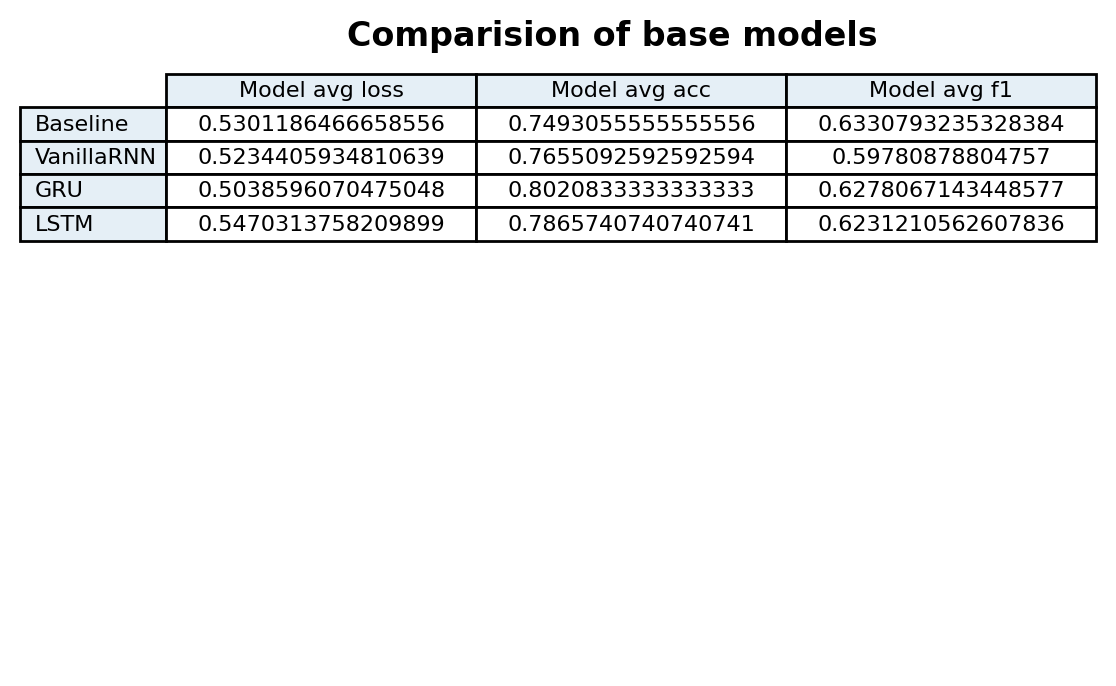

In [ ]:
from utils import draw_table

cell_text =  [[pool_avg_loss, pool_avg_acc, pool_avg_f1], [vanilla_avg_loss,vanilla_avg_acc,vanilla_avg_f1],[gru_avg_loss, gru_avg_acc,gru_avg_f1],[lstm_avg_loss,lstm_avg_acc,lstm_avg_f1]]
column_headers = ["Model avg loss", "Model avg acc", "Model avg f1"]
row_headers = ["Baseline", "VanillaRNN", "GRU", "LSTM"]

title = "Comparision of base models"

draw_table(column_headers,row_headers,cell_text, title)

Iz priložene tablice vidimo da najbolje rezultate postiže GRU RNN model

# Eksperiment 2 - pretraga hiperparametara
U ovom eksperimentu proučavamo utjecaj različitih hiperparametara na rezultate modela. Kako bi lakše procijenio utjecaj određenog hiperparametra, u jednom trenutku mijenjam samo 1 hiperparametar, dok ostale postavljam na "default" vrijednosti (vrijednosti korištene u Eksperimentu 1). Za svaki hiperparametar proučavamo njegov utjecaj na svaki od tipova RNN ćelija

In [ ]:
import torch
from RNNTask4 import *

nets = ["vanilla", "gru", "lstm"]

def test_train(hidden_size, num_layers, dropout, bidirectional):
  vanilla_loss = 0
  vanilla_acc = 0
  vanilla_f1 = 0

  gru_loss = 0
  gru_acc = 0
  gru_f1 = 0

  lstm_loss = 0
  lstm_acc = 0
  lstm_f1 = 0
  # koristim seedove, tako da ne moram stalno ponavljati eksperimente X puta i uprosječivati
  for net in nets:
    torch.manual_seed(7052020)
    np.random.seed(7052020)
    train_dataset = NLPDataset('data/sst_train_raw.csv')
    test_dataset = NLPDataset('data/sst_test_raw.csv', train_dataset.data_voc, train_dataset.label_voc)
    val_dataset = NLPDataset('data/sst_valid_raw.csv', train_dataset.data_voc, train_dataset.label_voc)

    vocab = train_dataset.data_voc
    embedding_matrix = vocab.get_embedding_matrix("data_utils/sst_glove_6b_300d.txt")

    # test accuracy, test f1

    test_loss_list = []
    test_acc_list = []
    test_f1_list = []

    model = RNN(embedding_matrix, net, hidden_size, num_layers, dropout, bidirectional)
    model.train(train_dataset, val_dataset, no_epochs=10, lr = 1e-4, weight_decay=0, batch_size=10)

    dataloader_test = DataLoader(dataset=test_dataset, batch_size=32, 
                                    shuffle=True, collate_fn=pad_collate_fn, drop_last=True)
    test_loss, test_avg_accuracy, test_avg_precision, eval_avg_recall, test_avg_f1, conf_matrix_test = model.evaluate(dataloader_test, 32)

    if (net == "vanilla"):
      vanilla_loss = test_loss
      vanilla_acc = test_avg_accuracy
      vanilla_f1 = test_avg_f1
    elif(net == "gru"):
      gru_loss = test_loss
      gru_acc = test_avg_accuracy
      gru_f1 = test_avg_f1
    else:
      lstm_loss = test_loss
      lstm_acc = test_avg_accuracy
      lstm_f1 = test_avg_f1

  return [vanilla_loss, vanilla_acc, vanilla_f1], [gru_loss, gru_acc, gru_f1], [lstm_loss, lstm_acc, lstm_f1]

Eksperiment 2a - usporedba utjecaja veličine skrivenih slojeva (parametar hidden size)
Koristimo veličinu parametra 50, 150, te 300



In [ ]:
hidden_sizes = [25, 50, 150, 300]

measurments = dict()

for size in hidden_sizes:
  result = test_train(size, 2, 0, False)
  measurments.update({size:result})

Kreiram svoj data vocabulary
Epoch: 0 , loss: 0.6925272982072279


/content/utils.py:11: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)
/content/utils.py:14: RuntimeWarning: invalid value encountered in true_divide
  f1 = tp / (tp + 0.5 * (tp + fn))


Eval set: Avg. loss: 0.6931, Accuracy: 0.5033, Precision: 0.5000, Recall: 0.9883 F1: 0.6637

Conf matrix eval: [897, 12, 19, 892]
Epoch: 1 , loss: 0.692344050875978
Eval set: Avg. loss: 0.6934, Accuracy: 0.5022, Precision: 0.8000, Recall: 0.9976 F1: 0.6661

Conf matrix eval: [906, 3, 8, 903]
Epoch: 2 , loss: 0.6917524628901068
Eval set: Avg. loss: 0.6929, Accuracy: 0.5027, Precision: 0.6000, Recall: 0.9977 F1: 0.6661

Conf matrix eval: [906, 2, 9, 903]
Epoch: 3 , loss: 0.6908854116938706
Eval set: Avg. loss: 0.6948, Accuracy: 0.5038, Precision: 0.5000, Recall: 0.9922 F1: 0.6646

Conf matrix eval: [901, 7, 16, 896]
Epoch: 4 , loss: 0.6883835183574974
Eval set: Avg. loss: 0.6951, Accuracy: 0.5033, Precision: 0.5000, Recall: 0.9900 F1: 0.6640

Conf matrix eval: [901, 8, 15, 896]
Epoch: 5 , loss: 0.6890672320403115
Eval set: Avg. loss: 0.6908, Accuracy: 0.5143, Precision: 0.5000, Recall: nan F1: nan

Conf matrix eval: [874, 34, 62, 850]
Epoch: 6 , loss: 0.6458646007355927


/content/utils.py:12: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Eval set: Avg. loss: 0.6150, Accuracy: 0.6736, Precision: 0.6667, Recall: 0.5182 F1: 0.4805

Conf matrix eval: [467, 441, 759, 153]
Epoch: 7 , loss: 0.5906487838122886
Eval set: Avg. loss: 0.5953, Accuracy: 0.7071, Precision: 0.6667, Recall: 0.7410 F1: 0.5849

Conf matrix eval: [674, 235, 613, 298]
Epoch: 8 , loss: 0.5590497527077708
Eval set: Avg. loss: 0.6618, Accuracy: 0.6830, Precision: 0.7500, Recall: 0.9090 F1: 0.6406

Conf matrix eval: [823, 85, 420, 492]
Epoch: 9 , loss: 0.5351963344250801
Eval set: Avg. loss: 0.5875, Accuracy: 0.7176, Precision: 0.7500, Recall: 0.8675 F1: 0.6274

Conf matrix eval: [790, 118, 516, 396]
Best epoch:  9
Kreiram svoj data vocabulary
Epoch: 0 , loss: 0.6922047047773537
Eval set: Avg. loss: 0.6938, Accuracy: 0.4984, Precision: 0.6000, Recall: 0.9992 F1: 0.6665

Conf matrix eval: [907, 1, 0, 912]
Epoch: 1 , loss: 0.6901335208919007
Eval set: Avg. loss: 0.6916, Accuracy: 0.5016, Precision: 0.5000, Recall: 0.9919 F1: 0.6645

Conf matrix eval: [901, 7, 1

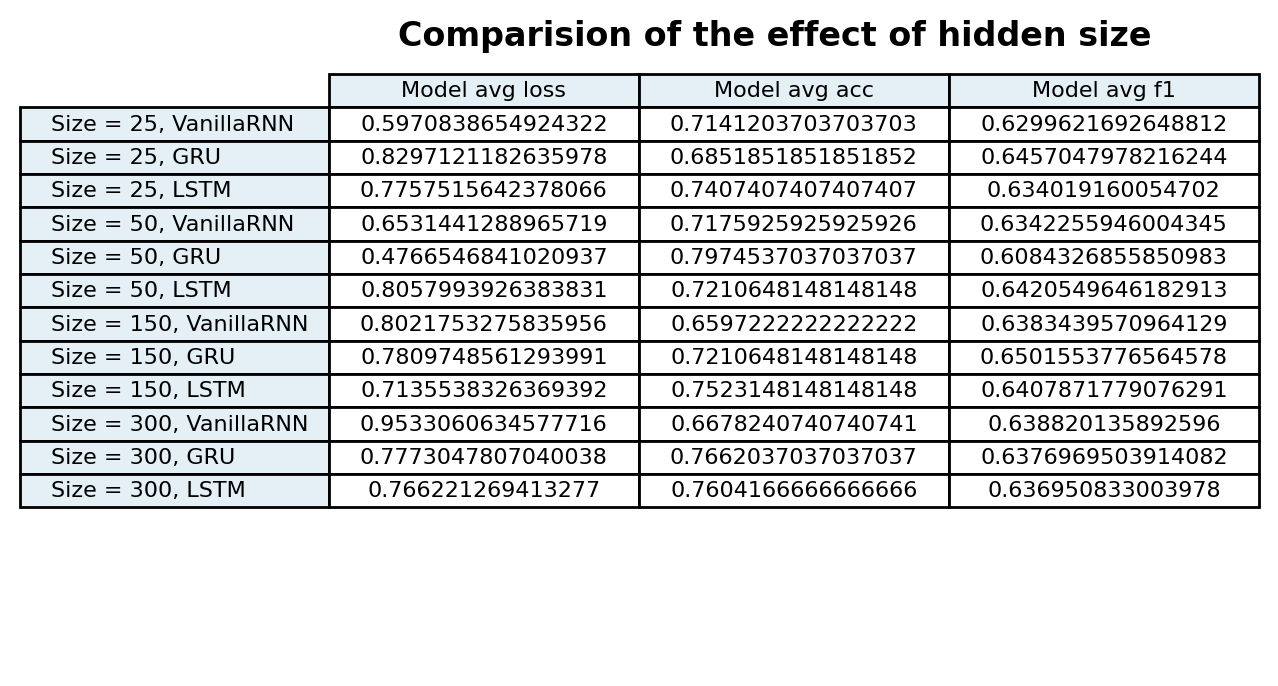

In [ ]:
measurments

cell_text = []

for size in hidden_sizes:
  for i in range(3):
    cell_text.append(measurments[size][i])

#cell_text =  [measurments[50], measurments[150],measurments[300]]
column_headers = ["Model avg loss", "Model avg acc", "Model avg f1"]
row_headers = ["Size = 25, VanillaRNN", "Size = 25, GRU", "Size = 25, LSTM", "Size = 50, VanillaRNN", "Size = 50, GRU", "Size = 50, LSTM", "Size = 150, VanillaRNN", "Size = 150, GRU", "Size = 150, LSTM", "Size = 300, VanillaRNN", "Size = 300, GRU", "Size = 300, LSTM"]

title = ("Comparision of the effect of hidden size")

draw_table(column_headers,row_headers,cell_text, title)

Iz navedenih rezultata, mogu zaključiti da povećanje broja parametara skrivenih stanja najviše pomaže LSTM modelu, dok Vanilla i GRU modelu baš i ne

# Eksperiment 2b - usporedba utjecaja broja RNN slojeva
Koristimo veličinu parametra 1, 2, te 6





In [ ]:

num_layers = [1, 2, 6, 12]

measurments = dict()

for layers in num_layers:
  result = test_train(150,layers, 0, False)
  measurments.update({layers:result})

Kreiram svoj data vocabulary
Epoch: 0 , loss: 0.6918249092350116
Eval set: Avg. loss: 0.6967, Accuracy: 0.4995, Precision: 0.8000, Recall: 0.9944 F1: 0.6653

Conf matrix eval: [902, 6, 7, 905]
Epoch: 1 , loss: 0.6560523390253156


/content/utils.py:11: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)
/content/utils.py:14: RuntimeWarning: invalid value encountered in true_divide
  f1 = tp / (tp + 0.5 * (tp + fn))


Eval set: Avg. loss: 0.5587, Accuracy: 0.7324, Precision: 0.5714, Recall: 0.7485 F1: 0.5858

Conf matrix eval: [678, 231, 655, 256]
Epoch: 2 , loss: 0.5338040288602341
Eval set: Avg. loss: 0.5325, Accuracy: 0.7467, Precision: 0.7500, Recall: nan F1: nan

Conf matrix eval: [784, 125, 575, 336]
Epoch: 3 , loss: 0.4937090770034604
Eval set: Avg. loss: 0.5356, Accuracy: 0.7363, Precision: 0.3333, Recall: 0.7607 F1: 0.5900

Conf matrix eval: [691, 217, 649, 263]
Epoch: 4 , loss: 0.4865777168121469
Eval set: Avg. loss: 0.7795, Accuracy: 0.6423, Precision: 0.5714, Recall: 0.9619 F1: 0.6561

Conf matrix eval: [875, 33, 294, 618]
Epoch: 5 , loss: 0.4829531766883383


/content/utils.py:12: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Eval set: Avg. loss: 0.5896, Accuracy: 0.7077, Precision: 0.2000, Recall: 0.8672 F1: 0.6256

Conf matrix eval: [785, 124, 503, 408]
Epoch: 6 , loss: 0.47437340450726145
Eval set: Avg. loss: 0.6040, Accuracy: 0.7071, Precision: 0.6000, Recall: 0.8184 F1: 0.6127

Conf matrix eval: [741, 167, 546, 366]
Epoch: 7 , loss: 0.46172172930414623
Eval set: Avg. loss: 0.6768, Accuracy: 0.6912, Precision: 0.8333, Recall: 0.8455 F1: 0.6193

Conf matrix eval: [766, 142, 492, 420]
Epoch: 8 , loss: 0.4667363840429855
Eval set: Avg. loss: 0.6962, Accuracy: 0.6945, Precision: 0.6000, Recall: 0.8856 F1: 0.6345

Conf matrix eval: [797, 112, 467, 444]
Epoch: 9 , loss: 0.4616456744234169
Eval set: Avg. loss: 0.8317, Accuracy: 0.6786, Precision: 0.5000, Recall: 0.9379 F1: 0.6500

Conf matrix eval: [847, 61, 388, 524]
Best epoch:  2
Kreiram svoj data vocabulary
Epoch: 0 , loss: 0.6921665072441101
Eval set: Avg. loss: 0.6915, Accuracy: 0.5154, Precision: 0.7778, Recall: 0.9696 F1: 0.6586

Conf matrix eval: [884

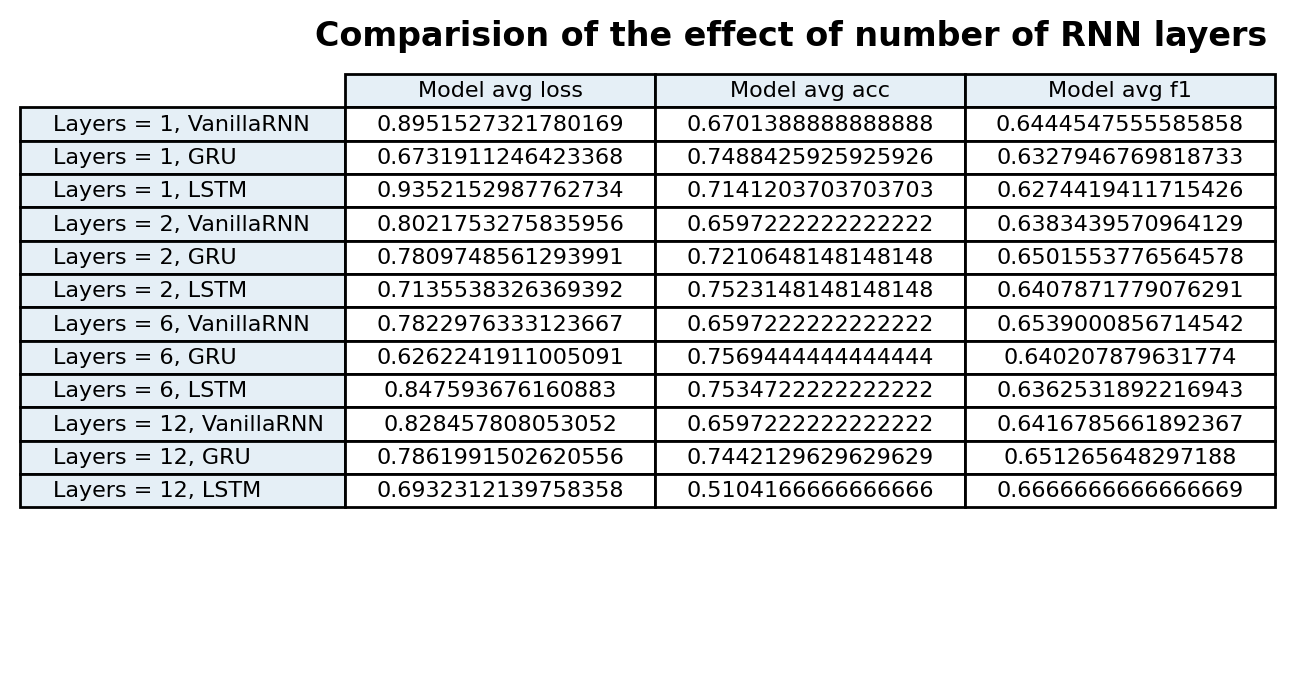

In [ ]:
cell_text = []

for layers in num_layers:
  for i in range(3):
    cell_text.append(measurments[layers][i])

#cell_text =  [measurments[50], measurments[150],measurments[300]]
column_headers = ["Model avg loss", "Model avg acc", "Model avg f1"]
row_headers = ["Layers = 1, VanillaRNN", "Layers = 1, GRU", "Layers = 1, LSTM", "Layers = 2, VanillaRNN", "Layers = 2, GRU", 
               "Layers = 2, LSTM", "Layers = 6, VanillaRNN", "Layers = 6, GRU", "Layers = 6, LSTM", "Layers = 12, VanillaRNN", "Layers = 12, GRU", "Layers = 12, LSTM"]

title = ("Comparision of the effect of number of RNN layers")

draw_table(column_headers,row_headers,cell_text, title)

Općenito možemo zaključiti da povećanje broja skrivenih RNN slojeva pomaže u radu modela (iako vidimo par zanimljivih iznimki)

# Eksperiment 2c - usporedba utjecaja korištenja dropouta

Koristim vjerojatnosti 0, 0.33 i 0.66


In [ ]:
dropouts = [0, 0.33, 0.66]

measurments = dict()

for dropout in dropouts:
  result = test_train(150,2, dropout, False)
  measurments.update({dropout:result})

Kreiram svoj data vocabulary
Epoch: 0 , loss: 0.6815218519354831


/content/utils.py:11: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)
/content/utils.py:14: RuntimeWarning: invalid value encountered in true_divide
  f1 = tp / (tp + 0.5 * (tp + fn))


Eval set: Avg. loss: 0.6024, Accuracy: 0.7016, Precision: 0.3333, Recall: 0.8439 F1: 0.6186

Conf matrix eval: [771, 137, 506, 406]
Epoch: 1 , loss: 0.5301702134095865
Eval set: Avg. loss: 0.7231, Accuracy: 0.6632, Precision: 0.5000, Recall: 0.9124 F1: 0.6414

Conf matrix eval: [831, 77, 376, 536]
Epoch: 2 , loss: 0.5020106179219794


/content/utils.py:12: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Eval set: Avg. loss: 0.6904, Accuracy: 0.6780, Precision: 0.2500, Recall: 0.8731 F1: 0.6308

Conf matrix eval: [795, 114, 439, 472]
Epoch: 3 , loss: 0.4882348549654546
Eval set: Avg. loss: 0.8072, Accuracy: 0.6791, Precision: 0.5000, Recall: 0.8924 F1: 0.6371

Conf matrix eval: [810, 99, 426, 485]
Epoch: 4 , loss: 0.48226088815169527
Eval set: Avg. loss: 0.6787, Accuracy: 0.6775, Precision: 0.7143, Recall: 0.8793 F1: 0.6317

Conf matrix eval: [805, 104, 428, 483]
Epoch: 5 , loss: 0.477724029892528
Eval set: Avg. loss: 0.7239, Accuracy: 0.6654, Precision: 0.4286, Recall: 0.9011 F1: 0.6365

Conf matrix eval: [820, 89, 391, 520]
Epoch: 6 , loss: 0.46705375806659977
Eval set: Avg. loss: 0.6471, Accuracy: 0.6940, Precision: 0.6667, Recall: 0.8229 F1: 0.6134

Conf matrix eval: [745, 163, 518, 394]
Epoch: 7 , loss: 0.47425609903485444
Eval set: Avg. loss: 0.6629, Accuracy: 0.6846, Precision: 0.8333, Recall: nan F1: nan

Conf matrix eval: [804, 104, 442, 470]
Epoch: 8 , loss: 0.467125717453615

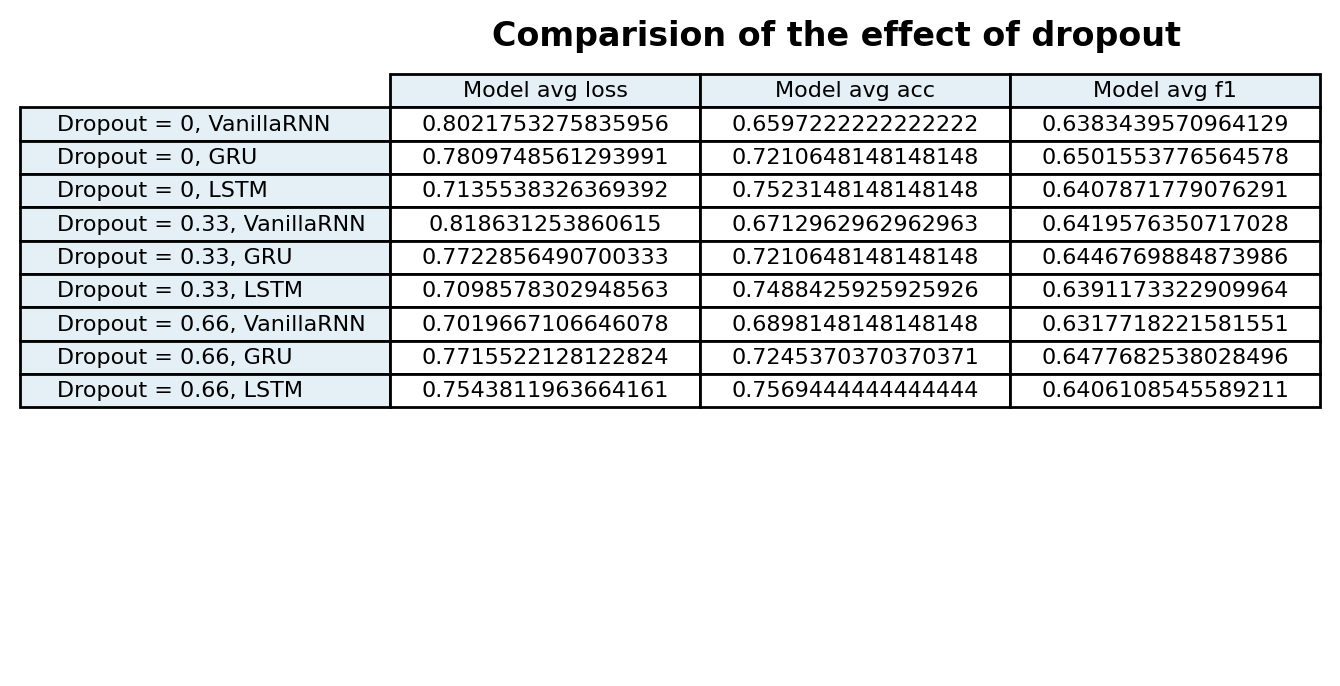

In [ ]:
cell_text = []

for dropout in dropouts:
  for i in range(3):
    cell_text.append(measurments[dropout][i])

#cell_text =  [measurments[50], measurments[150],measurments[300]]
column_headers = ["Model avg loss", "Model avg acc", "Model avg f1"]
row_headers = ["Dropout = 0, VanillaRNN", "Dropout = 0, GRU", "Dropout = 0, LSTM", "Dropout = 0.33, VanillaRNN", "Dropout = 0.33, GRU", "Dropout = 0.33, LSTM", "Dropout = 0.66, VanillaRNN", "Dropout = 0.66, GRU", "Dropout = 0.66, LSTM"]

title = ("Comparision of the effect of dropout")

draw_table(column_headers,row_headers,cell_text, title)

Vidimo da je uvođenje dropouta imalo najveći utjecaj na performanse Vanilla modela, dok na ostale modele dropout gotovo pa i nije imao utjecaj



# Eksperiment 2d - usporedba utjecaja bidirectional mreže

1.   List item
2.   List item




In [ ]:
bidirectional = [True, False]

measurments = dict()

for bidir in bidirectional:
  result = test_train(150,2, 0, bidir)
  if (bidir is True):
    measurments.update({"true":result})
  else:
    measurments.update({"false":result})


Kreiram svoj data vocabulary
Epoch: 0 , loss: 0.6870396836213983


/content/utils.py:11: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)
/content/utils.py:14: RuntimeWarning: invalid value encountered in true_divide
  f1 = tp / (tp + 0.5 * (tp + fn))


Eval set: Avg. loss: 0.6268, Accuracy: 0.6824, Precision: 0.7500, Recall: nan F1: nan

Conf matrix eval: [757, 152, 485, 426]
Epoch: 1 , loss: 0.5435779942361089


/content/utils.py:12: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Epoch: 2 , loss: 0.4932716858675542
Eval set: Avg. loss: 0.6479, Accuracy: 0.6940, Precision: 0.8000, Recall: 0.8754 F1: 0.6292

Conf matrix eval: [799, 109, 464, 448]
Epoch: 3 , loss: 0.48796035283691963
Eval set: Avg. loss: 0.8178, Accuracy: 0.6604, Precision: 0.7500, Recall: 0.9359 F1: 0.6494

Conf matrix eval: [850, 58, 352, 560]
Epoch: 4 , loss: 0.4816415854056791
Eval set: Avg. loss: 0.7773, Accuracy: 0.6505, Precision: 0.3333, Recall: nan F1: nan

Conf matrix eval: [865, 44, 319, 592]
Epoch: 5 , loss: 0.47200409673972626
Eval set: Avg. loss: 0.6301, Accuracy: 0.6720, Precision: 0.5000, Recall: 0.8752 F1: 0.6301

Conf matrix eval: [794, 114, 429, 483]
Epoch: 6 , loss: 0.47162918644187424
Eval set: Avg. loss: 0.7561, Accuracy: 0.6643, Precision: 0.6667, Recall: 0.8735 F1: 0.6283

Conf matrix eval: [796, 113, 413, 498]
Epoch: 7 , loss: 0.46588407239386803
Eval set: Avg. loss: 0.6262, Accuracy: 0.6659, Precision: 0.6250, Recall: nan F1: nan

Conf matrix eval: [803, 106, 409, 502]
Ep

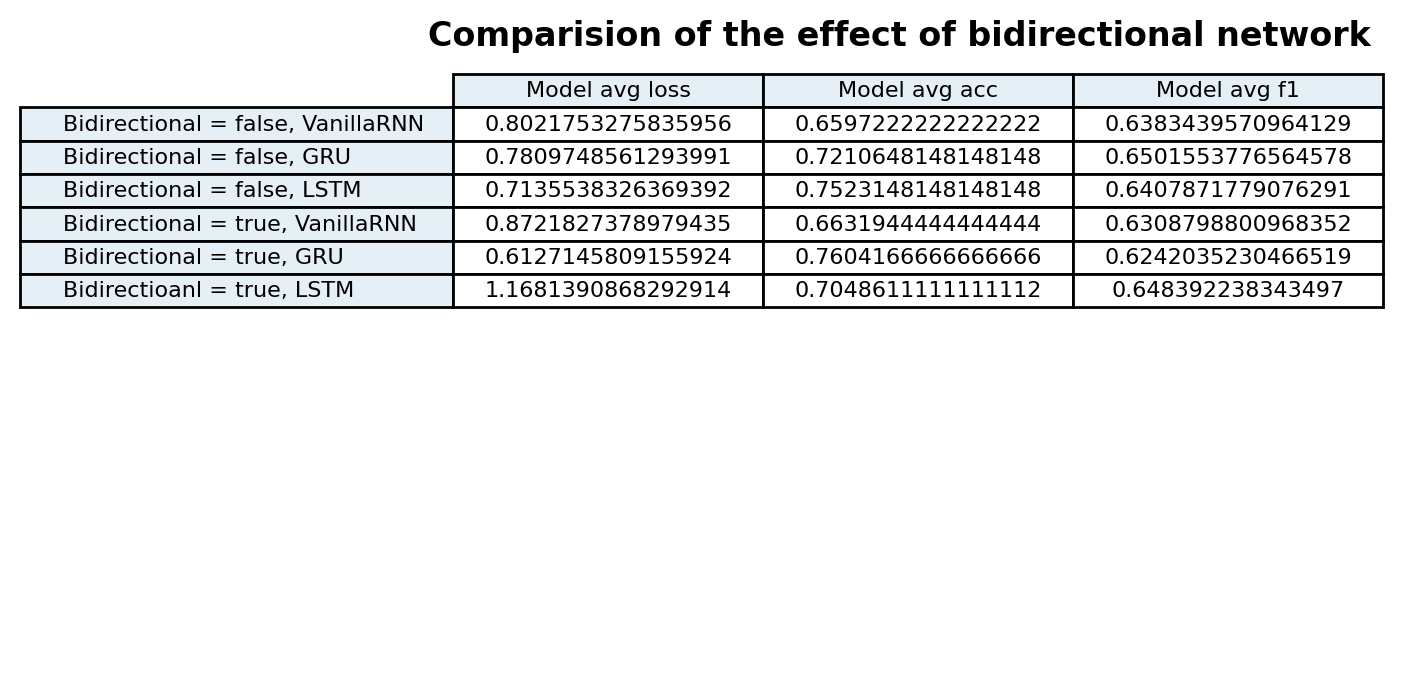

In [ ]:
cell_text = []

values = ["false", "true"]

for value in values:
  for i in range(3):
    cell_text.append(measurments[value][i])

column_headers = ["Model avg loss", "Model avg acc", "Model avg f1"]
row_headers = ["Bidirectional = false, VanillaRNN", "Bidirectional = false, GRU", "Bidirectional = false, LSTM", "Bidirectional = true, VanillaRNN", "Bidirectional = true, GRU", "Bidirectioanl = true, LSTM"]

title = ("Comparision of the effect of bidirectional network")

draw_table(column_headers,row_headers,cell_text, title)

Možemo primijetiti da korištenje dvosmjerne mreže dosta poboljšava performanse GRU mreže, ali narušava performanse mreže s LSTM ćelijama.

# Eksperiment 2e - pronalazak najbolje mreže

Iako bi (naivno) mogli pretpostaviti da će najbolja mreža jednostavno biti kombinacija najboljih hiperparametara iz prethodnih eksperimenata, pokazalo se da to nije tako - u nastavku prilažem rezultate testiranja GRU mreže sa raznim kombinacijama hiperparametara.


In [ ]:
# kod korišten za treniranje
from data_utils.NLPDataset import NLPDataset
from torch.utils.data import DataLoader
from data_utils.data_utils import pad_collate_fn

from RNNTask4 import *

train_dataset = NLPDataset('data/sst_train_raw.csv')
test_dataset = NLPDataset('data/sst_test_raw.csv', train_dataset.data_voc, train_dataset.label_voc)
val_dataset = NLPDataset('data/sst_valid_raw.csv', train_dataset.data_voc, train_dataset.label_voc)

vocab = train_dataset.data_voc
embedding_matrix = vocab.get_embedding_matrix("data_utils/sst_glove_6b_300d.txt")

# test accuracy, test f1

test_loss_list = []
test_acc_list = []
test_f1_list = []


for i in range(5):
  print("Iteracija ", i)
  model = RNN(embedding_matrix, "gru", 150, 6, 0.65, True)
  model.train(train_dataset, val_dataset, no_epochs=10, lr = 1e-4, weight_decay=0, batch_size=10)

  dataloader_test = DataLoader(dataset=test_dataset, batch_size=32, 
                                shuffle=True, collate_fn=pad_collate_fn, drop_last=True)
  test_loss, test_avg_accuracy, test_avg_precision, eval_avg_recall, test_avg_f1, conf_matrix_test = model.evaluate(dataloader_test, 32)

  test_loss_list.append(test_loss)
  test_acc_list.append(test_avg_accuracy)
  test_f1_list.append(test_avg_f1)

In [ ]:
# kod korišten za generiranje tablica

column_headers = ["Iteration 1", "Iteration 2", "Iteration 3", "Iteration 4", "Iteration 5"]
row_headers = ["Test BCE loss", "Test accuracy", "Test f1"]

cell_text = [test_loss_list, test_acc_list, test_f1_list]

title = ("Results of the 'best' model - bidirectional GRU, dropout = 0.65 hidden size = 150, number of layers = 6")

draw_table(column_headers,row_headers,cell_text, title)

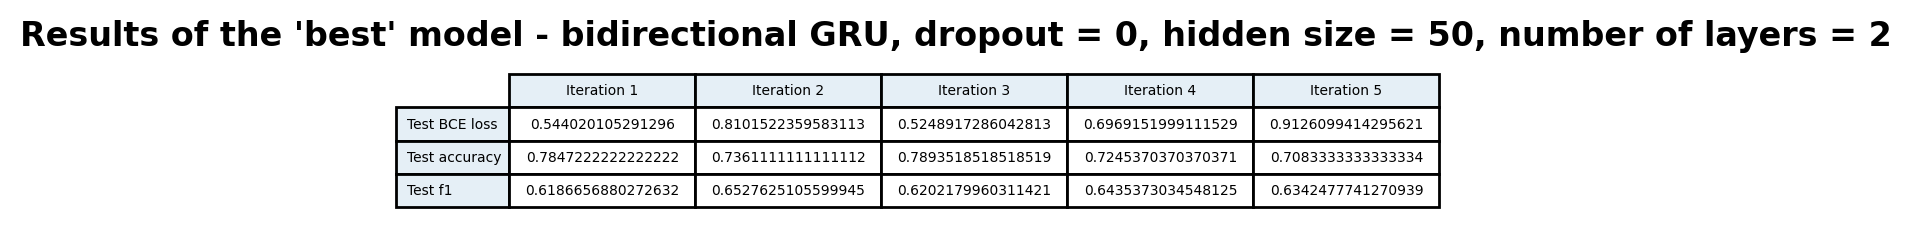

In [5]:
from IPython.display import Image
Image(filename="images/gru_1.png", width=1600)

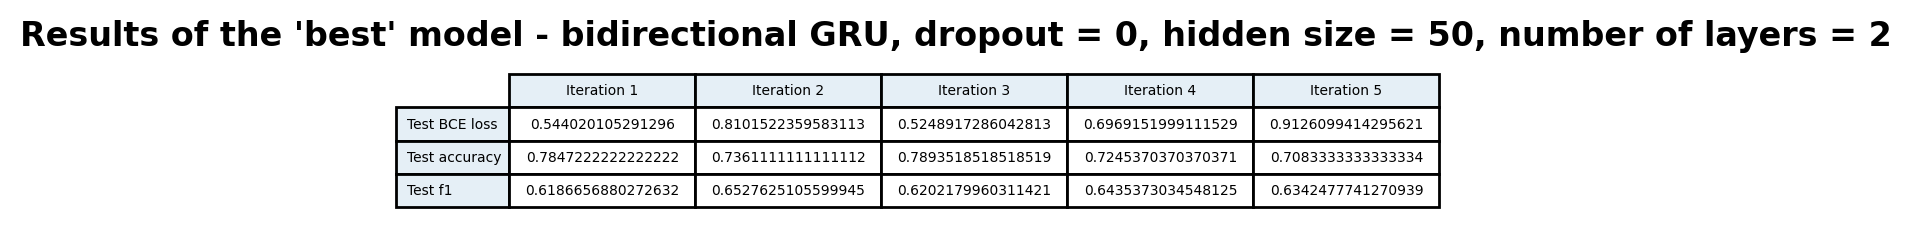

In [6]:
from IPython.display import Image
Image(filename="images/gru_2.png", width=1600)

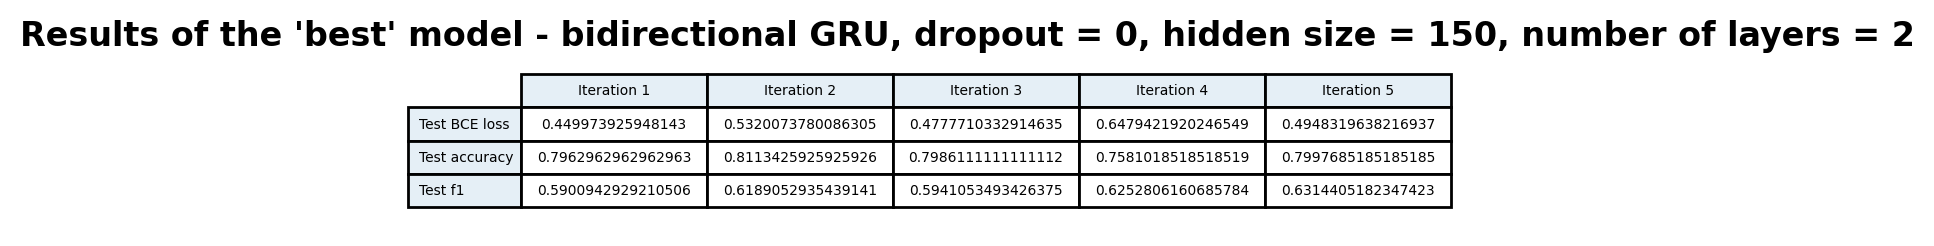

In [7]:
from IPython.display import Image
Image(filename="images/gru_3.png", width=1600)

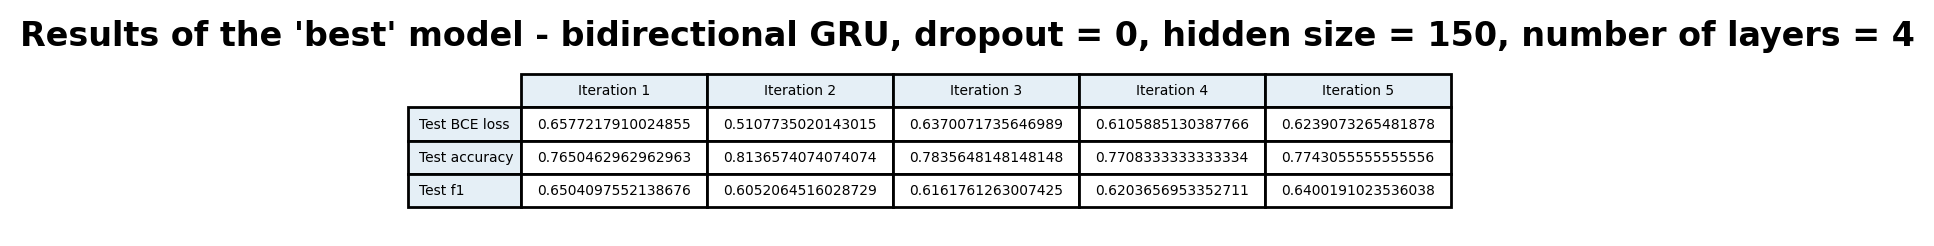

In [13]:
from IPython.display import Image
Image(filename="images/gru_4.png", width=1500)

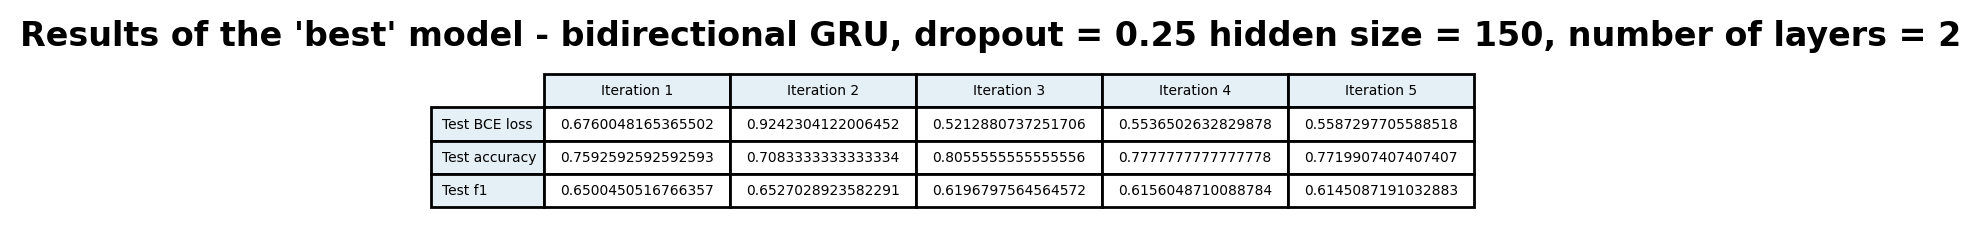

In [9]:
from IPython.display import Image
Image(filename="images/gru_5.png", width=1600)

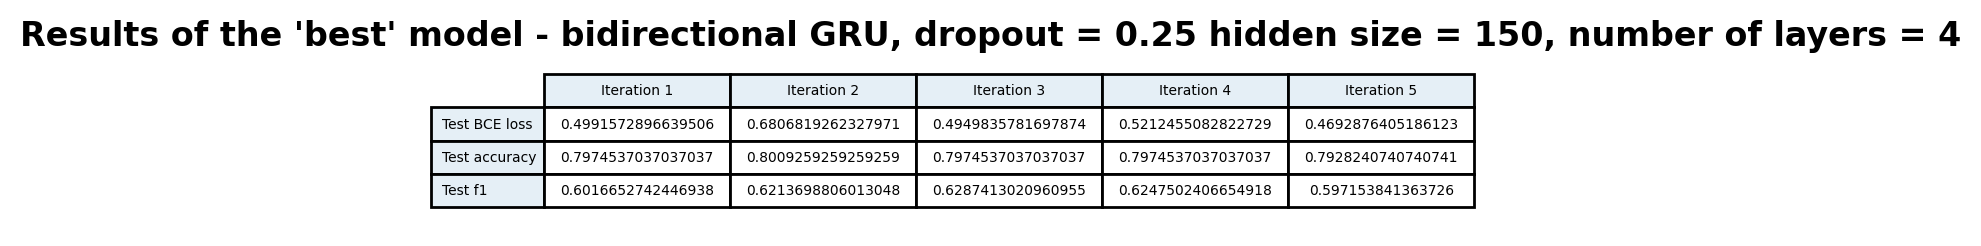

In [10]:
from IPython.display import Image
Image(filename="images/gru_6.png", width=1600)

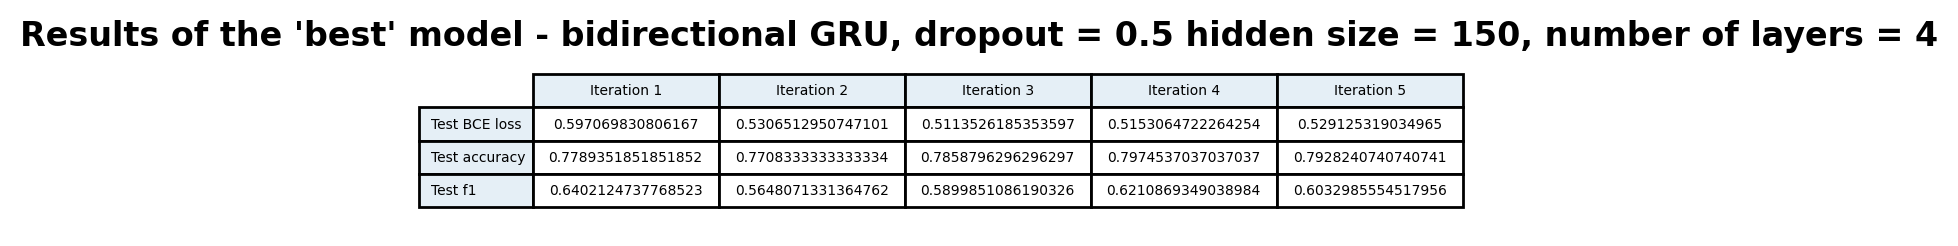

In [11]:
from IPython.display import Image
Image(filename="images/gru_7.png", width=1600)

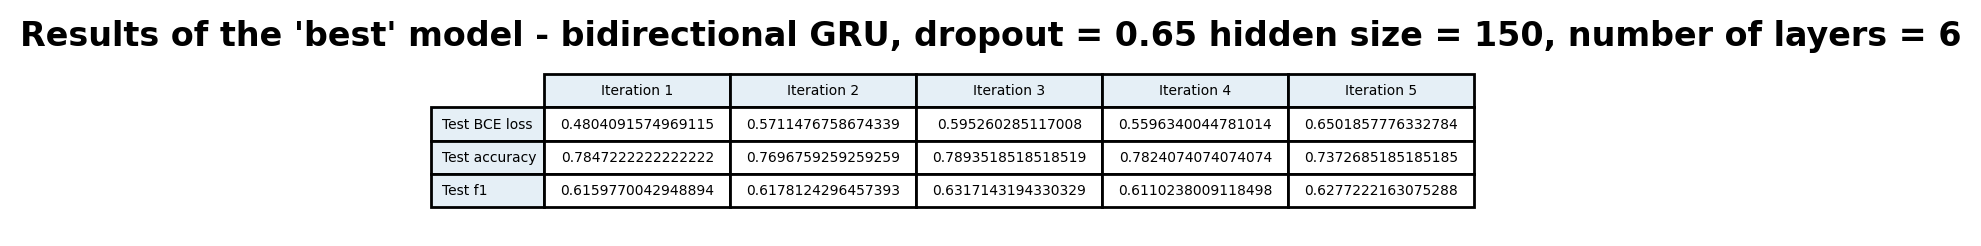

In [12]:
from IPython.display import Image
Image(filename="images/gru_8.png", width=1600)

Vidimo da najbolje rezultate (test accuracy) postižu 1) bidirectional GRU sa 2 RNN sloja i bez droputa, sa veličinom ćelije 150, te 2) bidirectional GRU sa 4 RNN sloja sa dropoutom = 0.25 te sa veličinom ćelije 150. Zbog stabilnijih rezultata, u daljnim eksperimentima koristim 2).

Jednu stvar koju možemo primijetiti kod brojnih modela je poprilično velika varijanca između pokretanja.


# Eksperiment 3 - utjecaj (prednaučenih) vektorskih reprezentacija

U ovom eksperimentu uspoređujemo utjecaj prednaučenih vektoskih reprezentacija na rad modela. Testiramo 2 modela - najbolji model iz eksperimenta 2 (bidirectional GRU sa 4 sloja, dropout = 0.25 te sa veličinom ćelije 150) te naš baseline model, PoolNet. Svaki od modela treniramo 5x, sa i bez prednaučenih GloVe vektorskih reprezentacija.

In [13]:
from data_utils.NLPDataset import NLPDataset
from torch.utils.data import DataLoader
from data_utils.data_utils import pad_collate_fn

from PoolNetTask2 import *
from RNNTask3 import *
from RNNTask4 import *

train_dataset = NLPDataset('data/sst_train_raw.csv')
test_dataset = NLPDataset('data/sst_test_raw.csv', train_dataset.data_voc, train_dataset.label_voc)
val_dataset = NLPDataset('data/sst_valid_raw.csv', train_dataset.data_voc, train_dataset.label_voc)

model = ["baseline", "gru"]

baseline_no_glove_loss = []
baseline_no_glove_acc = []
baseline_no_glove_f1 = []

baseline_glove_loss = []
baseline_glove_acc = []
baseline_glove_f1 = []

gru_no_glove_loss = []
gru_no_glove_acc = []
gru_no_glove_f1 = []

gru_glove_loss = []
gru_glove_acc = []
gru_glove_f1 = []

for m in model:
  # kod korišten za treniranje
  for i in ([0,1]):
    torch.manual_seed(7052025)
    np.random.seed(7052025)
    test_loss_list = []
    test_acc_list = []
    test_f1_list = []

    # ne koristimo pretrenirane vektore
    if (i == 0):
      print("i = ", i)
      print("Ne koristim pretrenirane vektore, koristim " + m + " model")
      vocab = train_dataset.data_voc
      embedding_matrix = vocab.get_embedding_matrix()
    else:
      print("i = ", i)
      print("Koristim pretrenirane vektore, koristim " + m +" model")
      vocab = train_dataset.data_voc
      embedding_matrix = vocab.get_embedding_matrix("data_utils/sst_glove_6b_300d.txt")


    if (m == "baseline"):
      model = PoolNet(embedding_matrix)
    else:
      model = RNN(embedding_matrix, "gru", 150, 4, 0.25, True)

   
    model.train(train_dataset, val_dataset, no_epochs=10, lr = 1e-4, weight_decay=0, batch_size=10)

    dataloader_test = DataLoader(dataset=test_dataset, batch_size=32, 
                                    shuffle=True, collate_fn=pad_collate_fn, drop_last=True)
    test_loss, test_avg_accuracy, test_avg_precision, eval_avg_recall, test_avg_f1, conf_matrix_test = model.evaluate(dataloader_test, 32)

    test_loss_list.append(test_loss)
    test_acc_list.append(test_avg_accuracy)
    test_f1_list.append(test_avg_f1)

    print(test_loss_list)
    print(test_acc_list)
    print(test_f1_list)    

    if (m == "baseline" and i == 0):
      baseline_no_glove_loss = test_loss_list
      baseline_no_glove_acc = test_acc_list
      baseline_no_glove_f1 = test_f1_list
    elif (m == "baseline" and i == 1):
      baseline_glove_loss = test_loss_list
      baseline_glove_acc = test_acc_list
      baseline_glove_f1 = test_f1_list
    elif (m == "gru" and i == 0):
      gru_no_glove_loss = test_loss_list
      gru_no_glove_acc = test_acc_list
      gru_no_glove_f1 = test_f1_list
    else:
      gru_glove_loss = test_loss_list
      gru_glove_acc = test_acc_list
      gru_glove_f1 = test_f1_list

Kreiram svoj data vocabulary
i =  0
Ne koristim pretrenirane vektore, koristim baseline model
Epoch: 0 , loss: 0.6874028041183604
Eval set: Avg. loss: 0.6800, Accuracy: 0.5896, Precision: 0.6667, Recall: 0.6076 F1: 0.5244

Conf matrix eval: [552, 356, 521, 391]
Epoch: 1 , loss: 0.6695780232118044


/content/utils.py:12: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)
/content/utils.py:15: RuntimeWarning: invalid value encountered in true_divide
  f1 = tp / (tp + 0.5 * (tp + fn))


Eval set: Avg. loss: 0.6623, Accuracy: 0.6121, Precision: 0.5556, Recall: 0.7237 F1: 0.5766

Conf matrix eval: [662, 247, 452, 459]
Epoch: 2 , loss: 0.6500228677009572


/content/utils.py:13: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


Eval set: Avg. loss: 0.6460, Accuracy: 0.6330, Precision: 0.7143, Recall: 0.6958 F1: 0.5632

Conf matrix eval: [632, 276, 520, 392]
Epoch: 3 , loss: 0.631295651541969
Eval set: Avg. loss: 0.6373, Accuracy: 0.6385, Precision: 0.5000, Recall: 0.7265 F1: 0.5795

Conf matrix eval: [664, 244, 498, 414]
Epoch: 4 , loss: 0.6150451570835417
Eval set: Avg. loss: 0.6385, Accuracy: 0.6319, Precision: 0.6250, Recall: nan F1: nan

Conf matrix eval: [702, 206, 448, 464]
Epoch: 5 , loss: 0.5987773664252607
Eval set: Avg. loss: 0.6344, Accuracy: 0.6396, Precision: 0.2857, Recall: 0.7398 F1: 0.5795

Conf matrix eval: [667, 241, 497, 415]
Epoch: 6 , loss: 0.5858872160746184
Eval set: Avg. loss: 0.6337, Accuracy: 0.6390, Precision: 0.8571, Recall: nan F1: nan

Conf matrix eval: [677, 231, 486, 426]
Epoch: 7 , loss: 0.5718381307545425
Eval set: Avg. loss: 0.6370, Accuracy: 0.6462, Precision: 0.7143, Recall: 0.7550 F1: 0.5875

Conf matrix eval: [684, 225, 492, 419]
Epoch: 8 , loss: 0.5593044320067574
Eval 

In [14]:
baseline_no_glove = [0.6442950897746615, 0.6655092592592593, 0.612596030491322]
baseline_glove = [0.5505819000579693,0.7453703703703703, 0.5668119556679537]
gru_no_glove = [1.4193255172835455, 0.7071759259259259, 0.5764098571130041]
gru_glove = [0.5819488090497477, 0.7962962962962963, 0.6134264874987359]


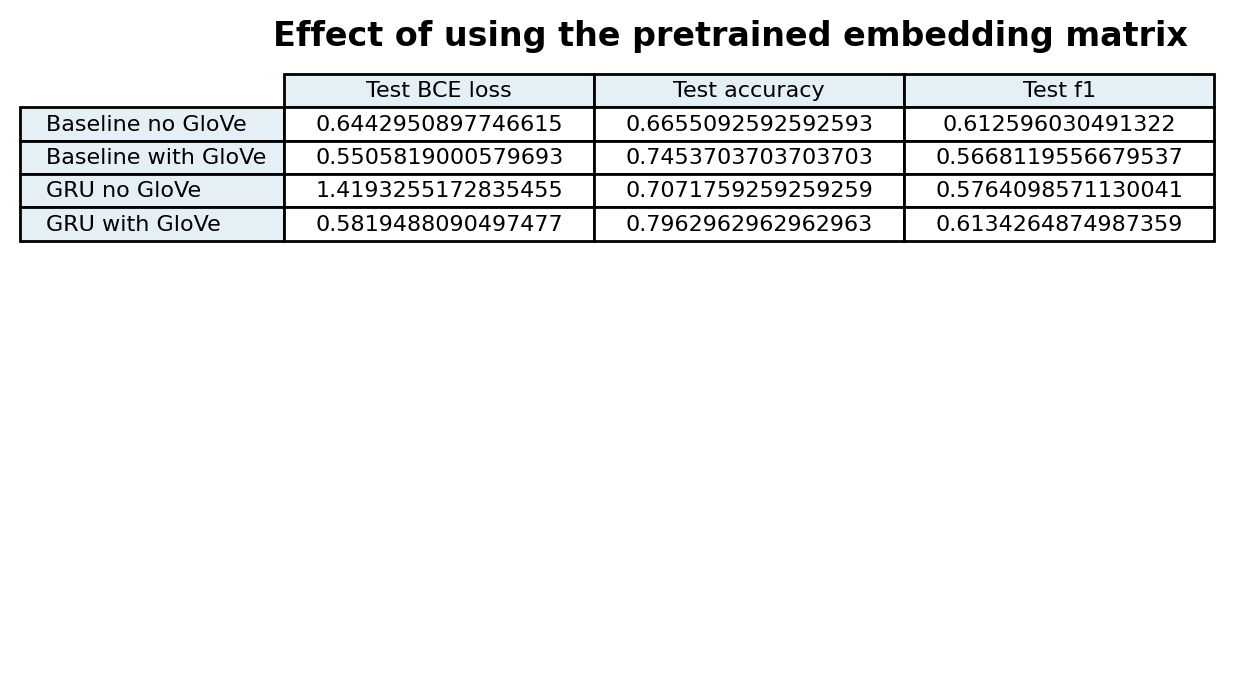

In [15]:
from utils import draw_table
row_headers = ["Baseline no GloVe", "Baseline with GloVe", "GRU no GloVe", "GRU with GloVe"]
column_headers = ["Test BCE loss", "Test accuracy", "Test f1"]

cell_text = [baseline_no_glove, baseline_glove, gru_no_glove, gru_glove]

title = ("Effect of using the pretrained embedding matrix")

draw_table(column_headers,row_headers,cell_text, title)

Vidimo da korištenje embedding matrice drastično podiže performanse. Vidimo da je uklanjanje GloVe embeddinga više manje podjednako naštetilo oba modela, jer je gubitak u točnosti oba modela za slučaj kad ne koristimo GloVe embeddinge oko 0.04-0.05



# Eksperiment 4 - Utjecaj veličine vokabulara na performanse modela

In [16]:
from data_utils.NLPDataset import NLPDataset
from torch.utils.data import DataLoader
from data_utils.data_utils import pad_collate_fn

from RNNTask3 import *
from RNNTask4 import *

model = ["baseline", "gru"]

baseline_loss_list = []
baseline_acc_list = []
baseline_f1_list = []

gru_loss_list = []
gru_acc_list = []
gru_f1_list = []


vocab_sizes = [1000, 5000, 100000]

for m in model:
  # kod korišten za treniranje
  for vocab_size in vocab_sizes:
    torch.manual_seed(12345)
    np.random.seed(12345)
    
    train_dataset = NLPDataset('data/sst_train_raw.csv', vocab_max_size=vocab_size)
    test_dataset = NLPDataset('data/sst_test_raw.csv', train_dataset.data_voc, train_dataset.label_voc,vocab_max_size=vocab_size)
    val_dataset = NLPDataset('data/sst_valid_raw.csv', train_dataset.data_voc, train_dataset.label_voc,vocab_max_size=vocab_size)

    vocab = train_dataset.data_voc
    embedding_matrix = vocab.get_embedding_matrix("data_utils/sst_glove_6b_300d.txt")

    if (m == "baseline"):
      print("Baseline, vocab_size=", vocab_size)
      model = PoolNet(embedding_matrix)
    else:
      print("GRU, vocab_size=", vocab_size)
      model = RNN(embedding_matrix, "gru", 150, 4, 0.25, True)

   
    model.train(train_dataset, val_dataset, no_epochs=10, lr = 1e-4, weight_decay=0, batch_size=10)

    dataloader_test = DataLoader(dataset=test_dataset, batch_size=32, 
                                    shuffle=True, collate_fn=pad_collate_fn, drop_last=True)
    test_loss, test_avg_accuracy, test_avg_precision, eval_avg_recall, test_avg_f1, conf_matrix_test = model.evaluate(dataloader_test, 32)

    print(test_loss)
    print(test_avg_accuracy)
    print(test_avg_f1)    
    
    if (m == "baseline"):
      baseline_loss_list.append(test_loss)
      baseline_acc_list.append(test_avg_accuracy)
      baseline_f1_list.append(test_avg_f1)
    else:
      gru_loss_list.append(test_loss)
      gru_acc_list.append(test_avg_accuracy)
      gru_f1_list.append(test_avg_f1)

Kreiram svoj data vocabulary
Baseline, vocab_size= 1000
Epoch: 0 , loss: 0.6861580142568302
Eval set: Avg. loss: 0.6818, Accuracy: 0.5302, Precision: 0.4444, Recall: 0.9741 F1: 0.6597

Conf matrix eval: [884, 24, 81, 831]
Epoch: 1 , loss: 0.6610077690613063


/content/utils.py:13: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/content/utils.py:12: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)
/content/utils.py:15: RuntimeWarning: invalid value encountered in true_divide
  f1 = tp / (tp + 0.5 * (tp + fn))


Eval set: Avg. loss: 0.6372, Accuracy: 0.6687, Precision: 0.5000, Recall: 0.7221 F1: 0.5747

Conf matrix eval: [658, 251, 559, 352]
Epoch: 2 , loss: 0.6336298401042216
Eval set: Avg. loss: 0.6101, Accuracy: 0.6923, Precision: 0.6000, Recall: nan F1: nan

Conf matrix eval: [611, 297, 649, 263]
Epoch: 3 , loss: 0.6143894620627337
Eval set: Avg. loss: 0.5859, Accuracy: 0.7044, Precision: 0.5714, Recall: 0.7286 F1: 0.5826

Conf matrix eval: [659, 250, 623, 288]
Epoch: 4 , loss: 0.5983521752705464
Eval set: Avg. loss: 0.5701, Accuracy: 0.7165, Precision: 1.0000, Recall: 0.6835 F1: 0.5608

Conf matrix eval: [619, 290, 685, 226]
Epoch: 5 , loss: 0.5866763056874964
Eval set: Avg. loss: 0.5594, Accuracy: 0.7170, Precision: 0.5000, Recall: nan F1: nan

Conf matrix eval: [604, 305, 701, 210]
Epoch: 6 , loss: 0.5723060658686079
Eval set: Avg. loss: 0.5520, Accuracy: 0.7264, Precision: 0.8000, Recall: nan F1: nan

Conf matrix eval: [650, 258, 672, 240]
Epoch: 7 , loss: 0.5683645406641022
Eval set: 

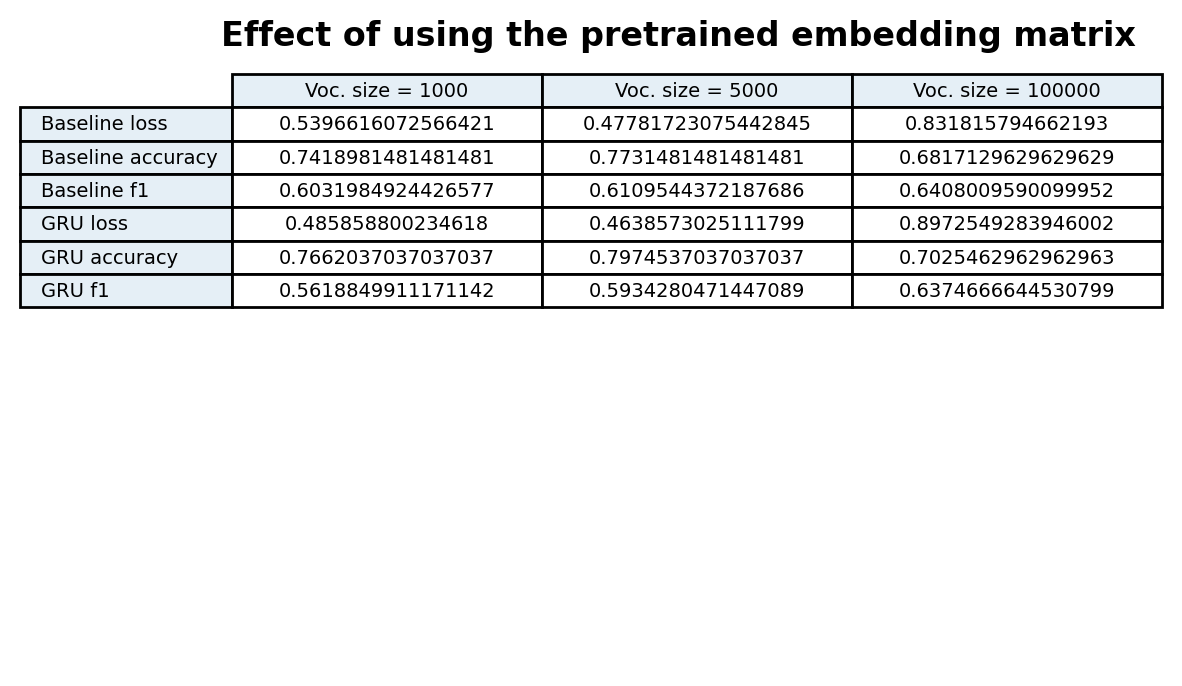

In [17]:
from utils import draw_table
row_headers = ["Baseline loss", "Baseline accuracy", "Baseline f1", "GRU loss", "GRU accuracy", "GRU f1"]
column_headers = ["Voc. size = 1000", "Voc. size = 5000", "Voc. size = 100000"]

cell_text = [baseline_loss_list, baseline_acc_list, baseline_f1_list, gru_loss_list, gru_acc_list, gru_f1_list]

title = ("Effect of vocabulary size")

draw_table(column_headers,row_headers,cell_text, title)

Vidimo, bar po meni, neočekivane rezultate - modeli su najbolje rezultate postigli za veličinu rječnika od 5000 riječi, a ne za neograničenu (100000, de facto neograničeno) veličinu rječnika.